In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#from openai import OpenAI
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the Vader lexicon (run this once)
#nltk.download('vader_lexicon')

In [ ]:
# client = OpenAI(
#     api_key=
# )

# def classify_sentiment(comment):
#     prompt = f"Classify the following Airbnb review comment as positive or negative: \"{comment}\""
#     response = client.chat.completions.create(
#         messages=[
#             {"role": "system", "content": "You are a helpful assistant for sentiment analysis."},
#             {"role": "user", "content": prompt}
#         ],
#         max_tokens=10,
#         temperature=0.5
#     )
#     sentiment = response['choices'][0]['message']['content'].strip().lower()
#     return sentiment

In [3]:
# Initialize the sentiment analyzer once
sia = SentimentIntensityAnalyzer()
def compute_positive_review_ratio(df):
    # Prepare the reviews data
    review_data = df['reviews'].fillna('').str.lower()

    positive_ratio = []
    for review in review_data:
        pros, cons, neutral = 0, 0, 0
        if review:
            # Split the review into individual comments
            comments = review.split("\n---------------------------------\n")
            for comment in comments:
                # Analyze the sentiment of each comment
                sentiment_score = sia.polarity_scores(comment)['compound']
                if sentiment_score >= 0.3:
                    pros += 1
                elif sentiment_score <= -0.3:
                    cons += 1
                else:
                    neutral += 1
        total = pros + cons + neutral
        # Calculate the positive review ratio
        ratio = pros / total if total > 0 else 0.5
        positive_ratio.append(ratio)

    # Create a new DataFrame with the positive review ratio
    positive_ratio_df = pd.DataFrame({'positive_review_ratio': positive_ratio})

    return positive_ratio_df

In [4]:
# Importing the dataset
train_data = pd.read_csv('./Data/train.csv')
test_data = pd.read_csv('./Data/test.csv')

# Compute the sentiment ratio
train_positive_ratio = compute_positive_review_ratio(train_data)
test_positive_ratio = compute_positive_review_ratio(test_data)

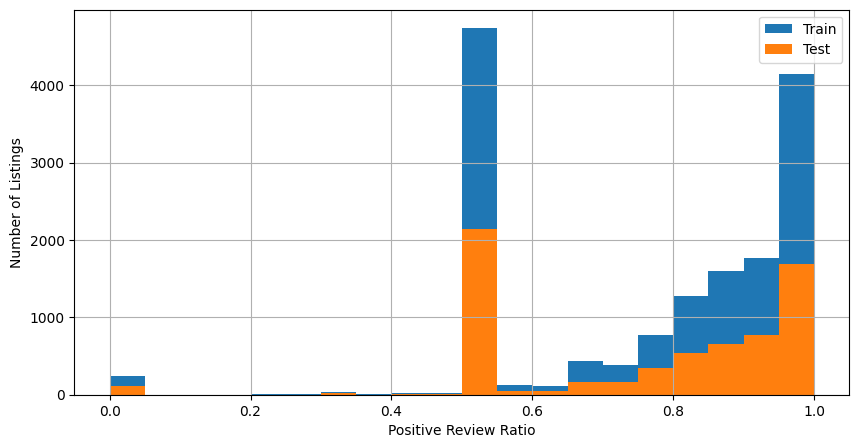

In [7]:
plt.figure(figsize=(10, 5))
plt.hist(train_positive_ratio, bins=20)
plt.hist(test_positive_ratio, bins=20)
plt.xlabel('Positive Review Ratio')
plt.ylabel('Number of Listings')
plt.legend(['Train', 'Test'])
plt.grid()
plt.show()

In [6]:
# output the data
# train_positive_ratio.to_csv('./Data_Preprocess/train_positive_ratio.csv', index=False)
# test_positive_ratio.to_csv('./Data_Preprocess/test_positive_ratio.csv', index=False)